In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv

In [2]:
data = read_csv("/Users/mrigank/Desktop/python_projects/ML_project/letter-recognition.data.csv", sep=',', header=None)

In [3]:
# peek at the data
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [4]:
data.shape

(20000, 17)

In [5]:
# data types for each dimensions
data.dtypes

0     object
1      int64
2      int64
3      int64
4      int64
5      int64
6      int64
7      int64
8      int64
9      int64
10     int64
11     int64
12     int64
13     int64
14     int64
15     int64
16     int64
dtype: object

In [9]:
# descriptive stats for each dimension
from pandas import set_option
set_option('precision',3)
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,4.024,7.035,5.122,5.372,3.506,6.898,7.500,4.629,5.179,8.282,6.454,7.929,3.046,8.339,3.692,7.801
std,1.913,3.305,2.015,2.261,2.190,2.026,2.325,2.700,2.381,2.488,2.631,2.081,2.333,1.547,2.567,1.617
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3.000,5.000,4.000,4.000,2.000,6.000,6.000,3.000,4.000,7.000,5.000,7.000,1.000,8.000,2.000,7.000
50%,4.000,7.000,5.000,6.000,3.000,7.000,7.000,4.000,5.000,8.000,6.000,8.000,3.000,8.000,3.000,8.000
75%,5.000,9.000,6.000,7.000,5.000,8.000,9.000,6.000,7.000,10.000,8.000,9.000,4.000,9.000,5.000,9.000
max,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000,15.000


In [15]:
# balance of classes :: group-by 0th column(letters)
data.groupby([0]).size()

0
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64

In [16]:
# attribute correlations
#set_option('precision',)
data.corr(method='pearson')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
1,1.000,0.758,0.852,0.673,0.619,-0.033,0.046,0.014,0.052,0.148,0.035,-0.046,0.489,0.098,0.274,-0.105
2,0.758,1.000,0.672,0.823,0.555,0.046,-0.041,-0.025,0.096,0.160,-0.055,-0.008,0.274,-0.001,0.231,-0.043
3,0.852,0.672,1.000,0.660,0.766,0.062,0.025,-0.099,0.057,0.115,0.012,-0.045,0.557,0.046,0.260,-0.118
4,0.673,0.823,0.660,1.000,0.644,0.043,-0.020,0.082,0.059,0.012,-0.012,0.026,0.265,0.025,0.298,-0.019
5,0.619,0.555,0.766,0.644,1.000,0.139,-0.029,-0.012,-0.066,-0.070,-0.073,-0.039,0.628,0.018,0.493,-0.063
6,-0.033,0.046,0.062,0.043,0.139,1.000,-0.357,-0.053,-0.123,0.086,-0.342,-0.032,0.144,-0.253,0.127,0.249
7,0.046,-0.041,0.025,-0.020,-0.029,-0.357,1.000,-0.119,-0.050,0.178,0.600,-0.272,-0.037,0.555,-0.078,-0.208
8,0.014,-0.025,-0.099,0.082,-0.012,-0.053,-0.119,1.000,-0.188,-0.318,0.043,0.082,0.142,-0.085,0.007,0.183
9,0.052,0.096,0.057,0.059,-0.066,-0.123,-0.050,-0.188,1.000,0.132,-0.060,0.119,-0.384,-0.053,0.278,-0.061
10,0.148,0.160,0.115,0.012,-0.070,0.086,0.178,-0.318,0.132,1.000,0.058,-0.107,-0.176,0.029,-0.087,-0.114


In [17]:
# places closer to 0 show lesser skew
data.skew()

1     0.715
2    -0.228
3     0.235
4    -0.278
5     0.943
6    -0.310
7     0.093
8     1.160
9     0.287
10    0.090
11    0.288
12    0.274
13    1.057
14    0.049
15    0.468
16   -0.200
dtype: float64

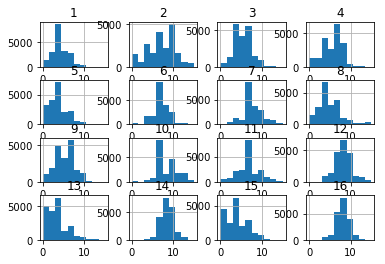

In [32]:
#
#plt.figure(figsize=(10,6))
data.hist()
plt.show()

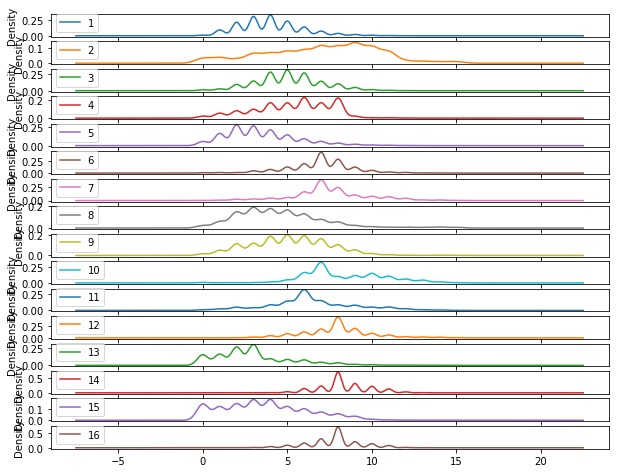

In [42]:
data.plot(kind='density', subplots=True)#, layout=(3,3), sharex=False)
plt.show()

In [49]:
#data.plot(kind='box', subplots=True)#, layout=(3,3), sharex=False)
#plt.show()

In [48]:
# scatter plot matrix
#from pandas.tools.plotting import scatter_matrix
#scatter_matrix(data)